# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [86]:
pip install scikit-learn --upgrade

  Using cached scikit_learn-1.1.1-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (30.8 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: 'COPYING'
Consider using the `--user` option or check the permissions.

Note: you may need to restart the kernel to use updated packages.


In [87]:
import numpy as np
import pandas as pd

import seaborn as sns

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import NearestNeighbors

from sklearn.model_selection import train_test_split

from IPython.display import display

!pip install sidetable
import sidetable as stb

import matplotlib.pyplot as plt



## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [88]:
df = pd.read_csv('/datasets/insurance_us.csv')

We rename the colums to make the code look more consistent with its style.

In [89]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [90]:
df.sample(10)

,gender,age,income,family_members,insurance_benefits
2781,0,21.0,51600.0,3,0
1999,1,34.0,42300.0,3,0
168,0,30.0,37300.0,0,0
561,0,19.0,42100.0,1,0
2621,0,31.0,29400.0,2,0
1340,1,20.0,37400.0,2,0
3984,1,37.0,29800.0,0,0
3303,0,25.0,52800.0,2,0
703,1,30.0,41700.0,2,0
1569,0,23.0,41100.0,1,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   float64
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [92]:
# we may want to fix the age type (from float to int) though this is not critical

# write your conversion here if you choose:

df.age=df.age.astype(int)
df.head()

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0


In [93]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [94]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?
df.shape

(5000, 5)

In [95]:
df.duplicated().sum()

153

So, there are 153 duplicated rows that needs to be removed.

In [96]:
df=df.drop_duplicates()
df.duplicated().sum()

0

In [97]:
df.shape

(4847, 5)

In [98]:
df.reset_index(drop=True,inplace=True)
df.tail()

,gender,age,income,family_members,insurance_benefits
4842,0,28,35700.0,2,0
4843,0,34,52400.0,1,0
4844,0,20,33900.0,2,0
4845,1,22,32700.0,3,0
4846,1,28,40600.0,1,0


duplicated data has removed.

In [99]:
df.stb.missing(style=True) #checking the missing data

,missing,total,percent
gender,0,"4,847",0.00%
age,0,"4,847",0.00%
income,0,"4,847",0.00%
family_members,0,"4,847",0.00%
insurance_benefits,0,"4,847",0.00%


No missing data.

Let's see the plots for every feature.

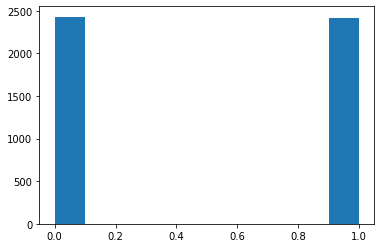

In [100]:
plt.hist(df['gender'], bins = 10)

plt.show()

In [101]:
df.gender.value_counts()

0    2431
1    2416
Name: gender, dtype: int64

More or less we have the same number of gender category.

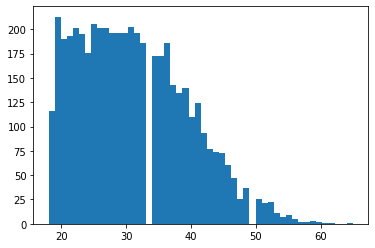

In [102]:
plt.hist(df['age'], bins = 50)

plt.show()

There are more young population then old one.

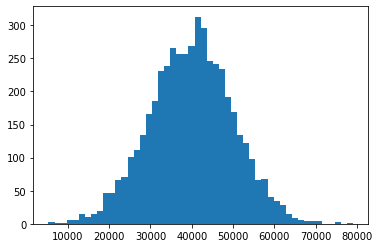

In [103]:
plt.hist(df['income'], bins = 50)

plt.show()

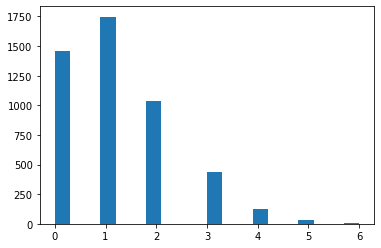

In [104]:
plt.hist(df['family_members'], bins = 20)

plt.show()

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

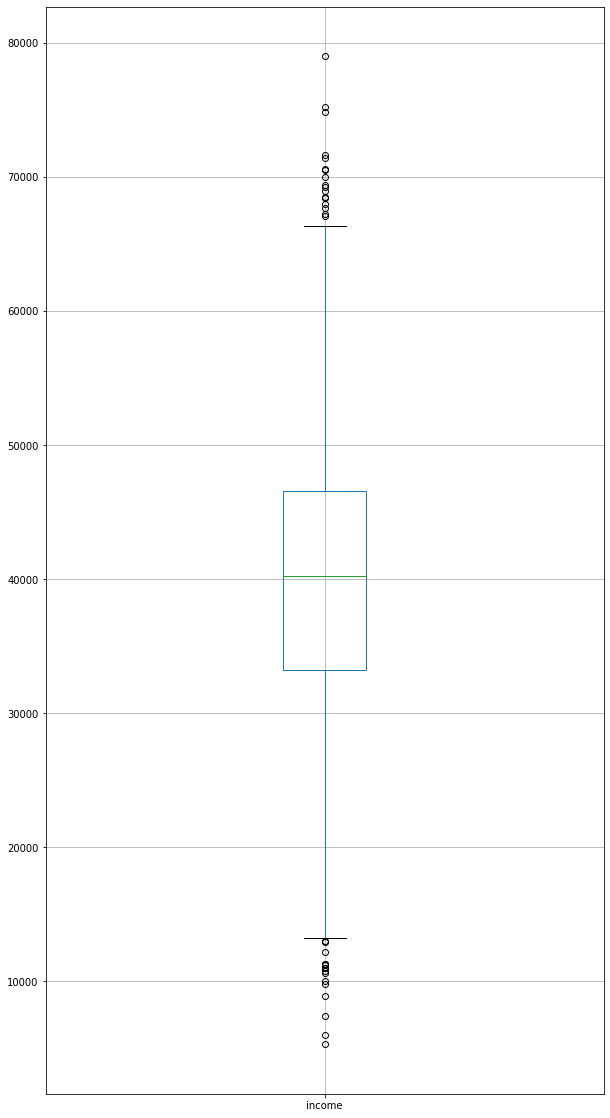

In [106]:
boxplot=df.boxplot('income',figsize=(10,20))

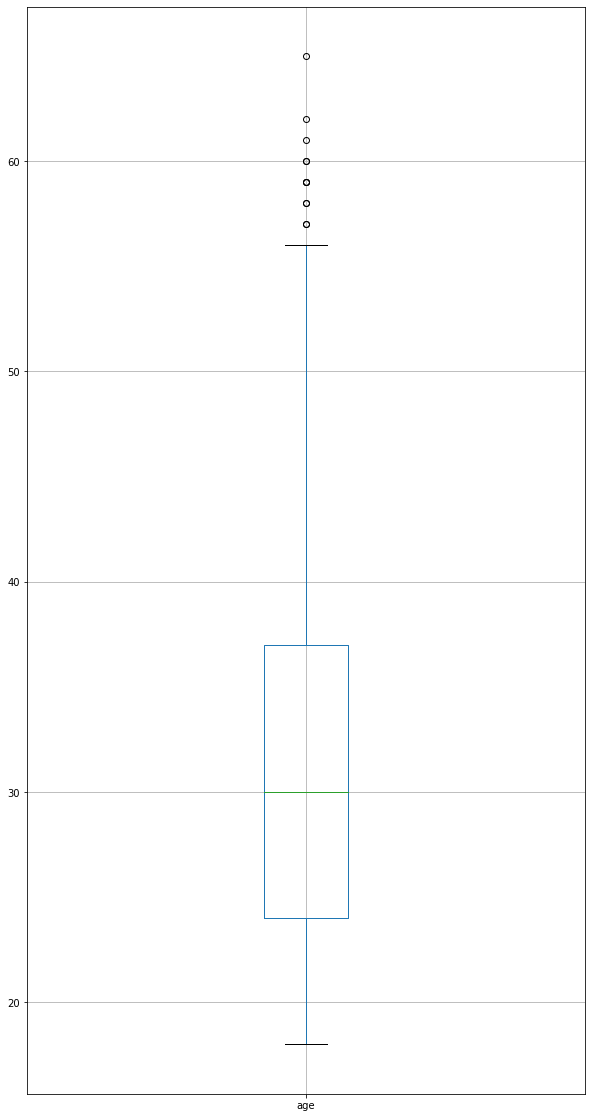

In [107]:
boxplot=df.boxplot('age',figsize=(10,20))

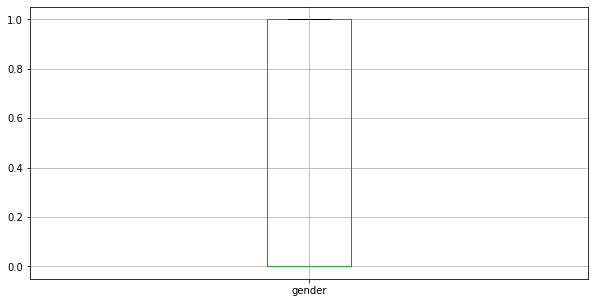

In [108]:
boxplot=df.boxplot('gender',figsize=(10,5))

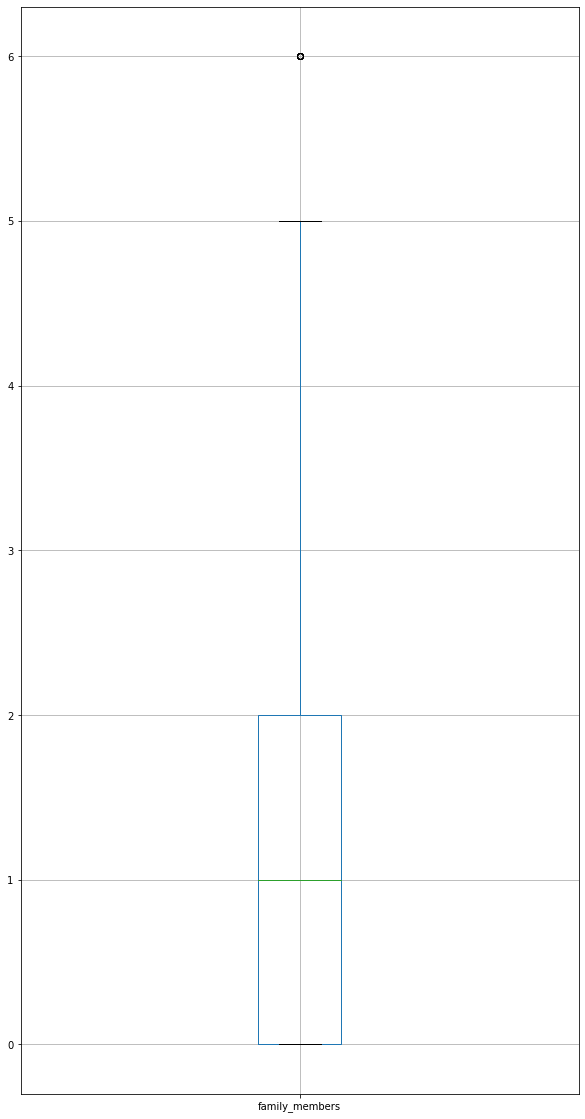

In [109]:
boxplot=df.boxplot('family_members',figsize=(10,20))

Even though I see the outliers but in this case the outlier values are still good for the analysis in my opinion.

let's see the correlation between the features and target

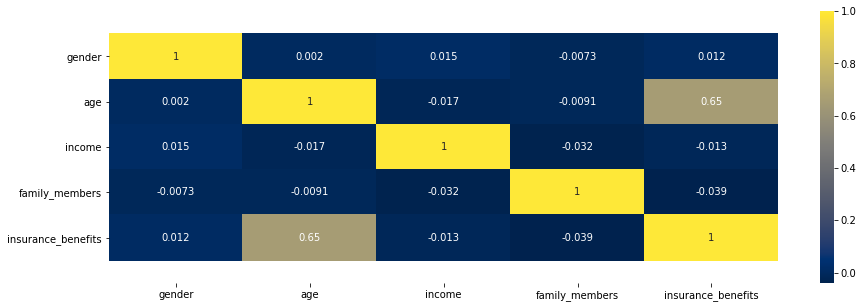

In [110]:
def corr(data):
    
    plt.figure(figsize=(15,5))
    ax = sns.heatmap(df.corr(), annot=True, cmap='cividis')
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5);
    plt.yticks(rotation=0);
corr(df)

It seems that we have not so bad correaltion between age and insurance benefits, interesting. Maybe the reason is that older people has more money and more stable jobs.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

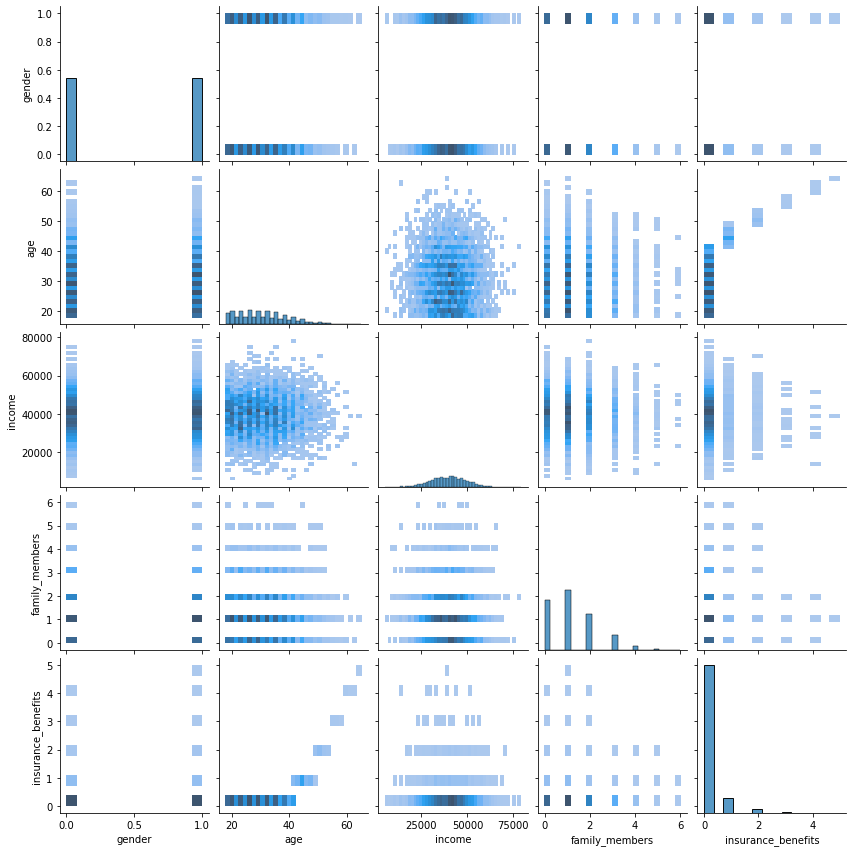

In [111]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [112]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [113]:
def get_knn(df, n, k, metrics):
    
    """
    Returns k nearest neighbors

    :param df: pandas DataFrame used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs  = NearestNeighbors(n_neighbors=k,metric=metrics)
    nbrs.fit(df) # <your code here> 
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    return df_res

Scaling the data.

In [114]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [115]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2096,1.0,0.323077,0.421519,0.500000,0
4170,0.0,0.492308,0.518987,0.166667,0
230,0.0,0.538462,0.388608,0.000000,0
3299,1.0,0.723077,0.432911,0.166667,1
3312,1.0,0.415385,0.581013,0.166667,0


Now, let's get similar records for a given one for every combination

No scaling results.

In [116]:
no_scale_euc=get_knn(df.drop(['insurance_benefits'],axis=1),1,4,'euclidean')

In [117]:
no_scale_euc

,gender,age,income,family_members,distance
1,0,46,38000.0,1,0.000000
3810,0,40,38000.0,0,6.082763
4796,1,37,38000.0,1,9.055385
2480,1,36,38000.0,0,10.099505


In [118]:
no_scale_manh=get_knn(df.drop(['insurance_benefits'],axis=1),1,4,'manhattan')
no_scale_manh

,gender,age,income,family_members,distance
1,0,46,38000.0,1,0.0
3810,0,40,38000.0,0,7.0
4796,1,37,38000.0,1,10.0
2480,1,36,38000.0,0,12.0


Scalling results.

In [119]:
scale_euc=get_knn(df_scaled.drop(['insurance_benefits'],axis=1),1,4,'euclidean')
scale_euc

,gender,age,income,family_members,distance
1,0.0,0.707692,0.481013,0.166667,0.000000
4041,0.0,0.707692,0.477215,0.166667,0.003797
1835,0.0,0.707692,0.492405,0.166667,0.011392
4833,0.0,0.723077,0.491139,0.166667,0.018418


In [120]:
scale_manh=get_knn(df_scaled.drop(['insurance_benefits'],axis=1),1,4,'manhattan')
scale_manh

,gender,age,income,family_members,distance
1,0.0,0.707692,0.481013,0.166667,0.000000
4041,0.0,0.707692,0.477215,0.166667,0.003797
1835,0.0,0.707692,0.492405,0.166667,0.011392
4833,0.0,0.723077,0.491139,0.166667,0.025511


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

The algorithm is the same, however results are not becuse scaled values are differs from the original values.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

There is a little difference between the Distance Metrics results and the Manhattan is greater because euclidean way is "shortest air distance".

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [121]:
# calculate the target

df['insurance_benefits_received'] = np.where(df.insurance_benefits>0,1,0)
df.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1,41,49600.0,1,0,0
1,0,46,38000.0,1,1,1
2,0,29,21000.0,0,0,0
3,0,21,41700.0,2,0,0
4,1,28,26100.0,0,0,0


In [122]:
df_scaled['insurance_benefits_received']= np.where(df_scaled.insurance_benefits>0,1,0)
df_scaled.head()

,gender,age,income,family_members,insurance_benefits,insurance_benefits_received
0,1.0,0.630769,0.627848,0.166667,0,0
1,0.0,0.707692,0.481013,0.166667,1,1
2,0.0,0.446154,0.265823,0.000000,0,0
3,0.0,0.323077,0.527848,0.333333,0,0
4,1.0,0.430769,0.330380,0.000000,0,0


In [123]:
# check for the class imbalance with value_counts()

# <your code here>

df.insurance_benefits_received.value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

In [124]:
df_scaled.insurance_benefits_received.value_counts()

0    4284
1     563
Name: insurance_benefits_received, dtype: int64

The number of zeros and ones are significantly differs therefore it will be better to upsample the data.

Let's split the data to train and test.

In [125]:
train_df,test_df=train_test_split(df,test_size=0.3)
train_df_scld,test_df_scld=train_test_split(df_scaled,test_size=0.3)

#Train.
#Non scaled splited data for train
target_train=train_df.insurance_benefits_received
features_train=train_df.drop(['insurance_benefits','insurance_benefits_received'],axis=1)

#Scaled splied data for train
target_train_scld=train_df_scld.insurance_benefits_received
features_train_scld=train_df_scld.drop(['insurance_benefits','insurance_benefits_received'],axis=1)

#Test.
#Non scaled test data
target_test=test_df.insurance_benefits_received
features_test=test_df.drop(['insurance_benefits','insurance_benefits_received'],axis=1)


#Scaled test data
target_test_scld=test_df_scld.insurance_benefits_received
features_test_scld=test_df_scld.drop(['insurance_benefits','insurance_benefits_received'], axis=1)


Let's upsample the data.

In [126]:
from sklearn.utils import shuffle

In [127]:
# Upsample function.
def upsample(features, target):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    repeat = int(len(target_zeros)/len(target_ones))

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled

Now it is time to use the upsamle function to trian the data properly.

In [128]:
#Non scaled train data.
features_train,target_train=upsample(features_train,target_train)
target_train.value_counts()/len(target_train)



0    0.523726
1    0.476274
Name: insurance_benefits_received, dtype: float64

More or less the same weight.

In [129]:
#scaled train data.

features_train_scld,target_train_scld=upsample(features_train_scld,target_train_scld)
target_train_scld.value_counts()/len(target_train_scld)

0    0.515868
1    0.484132
Name: insurance_benefits_received, dtype: float64

In [130]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [131]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [132]:
for P in [0, target_train.sum() / len(target_train), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P,len(target_test))# <your code here> 
        
    eval_classifier(target_test, y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.88109966 0.        ]
 [0.11890034 0.        ]]

The probability: 0.48
F1: 0.20
Confusion Matrix
[[0.46666667 0.41443299]
 [0.0604811  0.05841924]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.4467354  0.43436426]
 [0.05773196 0.06116838]]

The probability: 1.00
F1: 0.21
Confusion Matrix
[[0.         0.88109966]
 [0.         0.11890034]]



Let's create the K-NN algorithm.

Not scaled data.

In [133]:
from sklearn.neighbors import KNeighborsClassifier

In [134]:

def k_nn(k,features,target):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(features, target)
    return neigh


In [135]:
for i in range(1,11):
    print('For k=',i)
    knn_train=k_nn(i,features_train,target_train)
    knn_predict=knn_train.predict(features_test)
    f1=eval_classifier(target_test,knn_predict)
    print()

For k= 1
F1: 0.60
Confusion Matrix
[[0.85773196 0.0233677 ]
 [0.05773196 0.06116838]]

For k= 2
F1: 0.60
Confusion Matrix
[[0.85773196 0.0233677 ]
 [0.05841924 0.0604811 ]]

For k= 3
F1: 0.56
Confusion Matrix
[[0.82955326 0.05154639]
 [0.05223368 0.06666667]]

For k= 4
F1: 0.56
Confusion Matrix
[[0.82955326 0.05154639]
 [0.05223368 0.06666667]]

For k= 5
F1: 0.51
Confusion Matrix
[[0.79656357 0.08453608]
 [0.04879725 0.07010309]]

For k= 6
F1: 0.51
Confusion Matrix
[[0.79656357 0.08453608]
 [0.04948454 0.06941581]]

For k= 7
F1: 0.46
Confusion Matrix
[[0.75945017 0.12164948]
 [0.04604811 0.07285223]]

For k= 8
F1: 0.46
Confusion Matrix
[[0.75945017 0.12164948]
 [0.04604811 0.07285223]]

For k= 9
F1: 0.42
Confusion Matrix
[[0.71821306 0.1628866 ]
 [0.04329897 0.07560137]]

For k= 10
F1: 0.42
Confusion Matrix
[[0.71821306 0.1628866 ]
 [0.04329897 0.07560137]]



Scaled data.

In [136]:
for i in range(1,11):
    print('For k=',i)
    knn_train=k_nn(i,features_train_scld,target_train_scld)
    knn_predict=knn_train.predict(features_test_scld)
    f1=eval_classifier(target_test_scld,knn_predict)
    print()

For k= 1
F1: 0.95
Confusion Matrix
[[0.88453608 0.00412371]
 [0.00687285 0.10446735]]

For k= 2
F1: 0.95
Confusion Matrix
[[0.88453608 0.00412371]
 [0.00687285 0.10446735]]

For k= 3
F1: 0.93
Confusion Matrix
[[0.87697595 0.01168385]
 [0.00412371 0.10721649]]

For k= 4
F1: 0.93
Confusion Matrix
[[0.87697595 0.01168385]
 [0.00412371 0.10721649]]

For k= 5
F1: 0.90
Confusion Matrix
[[0.86597938 0.02268041]
 [0.00274914 0.10859107]]

For k= 6
F1: 0.90
Confusion Matrix
[[0.86597938 0.02268041]
 [0.00274914 0.10859107]]

For k= 7
F1: 0.89
Confusion Matrix
[[0.86460481 0.02405498]
 [0.00206186 0.10927835]]

For k= 8
F1: 0.89
Confusion Matrix
[[0.86460481 0.02405498]
 [0.00206186 0.10927835]]

For k= 9
F1: 0.86
Confusion Matrix
[[0.8556701  0.03298969]
 [0.00137457 0.10996564]]

For k= 10
F1: 0.86
Confusion Matrix
[[0.8556701  0.03298969]
 [0.00137457 0.10996564]]



K-nn model gives better results than dummy model aspecialy scaled data.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [137]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        weights=np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)
        self.weights = weights[1:]# <your code here>
        self.w0 = weights[0]
    def predict(self, X):
        
        # adding the unities
        X2 =X # <your code here>
        y_pred =X2.dot(self.weights) + self.w0 # <your code here>
        
        return y_pred

In [138]:
import math

In [139]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [140]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 3.58042291e-02  1.95594888e-02  5.85336165e-07 -1.21618420e-02]
RMSE: 0.36
R2: 0.66


Let's go over the scaled data.

In [141]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[ 2.32727489  0.01955949  0.04624156 -0.07297105]
RMSE: 0.36
R2: 0.66


The RMSE and R2 are the same for the scaled and non scaled data and RMSE<1 which means that our model works fine.

# Task 4. Obfuscating Data


It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [142]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [143]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [144]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [145]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

We see that there is no error so it menas that P matrix is invertible.

Can you guess the customers' ages or income after the transformation?

In [146]:
X_prime=X @ P

obfs_df = pd.DataFrame(X_prime, columns = personal_info_column_list)
obfs_df.head()


,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378


As we can see the data is "corrupted" since age of 18424 is not possible or family members or gender so no, we cannot guess customer's age or income from this data set. 

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [147]:
X_orig=(X_prime @ np.linalg.inv(P)).astype(int)
X_orig_df=pd.DataFrame(X_orig, columns = personal_info_column_list)
X_orig_df.head()

,gender,age,income,family_members
0,0,40,49600,1
1,0,46,37999,1
2,0,29,20999,0
3,0,21,41700,2
4,1,28,26100,0


In [148]:
df_pn.head()

,gender,age,income,family_members
0,1,41,49600.0,1
1,0,46,38000.0,1
2,0,29,21000.0,0
3,0,21,41700.0,2
4,1,28,26100.0,0


From the resuts above the recovery of original data is success.

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

The original data.

In [149]:
df_pn.tail(15)

,gender,age,income,family_members
4832,1,38,45800.0,0
4833,0,47,38800.0,1
4834,0,28,51300.0,1
4835,0,32,32500.0,1
4836,1,28,40900.0,1
4837,0,22,56800.0,1
4838,0,21,38300.0,3
4839,0,45,54600.0,0
4840,1,32,36000.0,1
4841,1,26,51400.0,0


The transformed one

In [150]:
obfs_df.head(15)

,gender,age,income,family_members
0,6359.715273,22380.404676,18424.090742,46000.696690
1,4873.294065,17160.367030,14125.780761,35253.455773
2,2693.117429,9486.397744,7808.831560,19484.860631
3,5345.603937,18803.227203,15479.148373,38663.061863
4,3347.176735,11782.829283,9699.998942,24211.273378
5,5258.770252,18509.859617,15237.193427,38032.317153
6,5091.845820,17920.455408,14752.111437,36824.378411
7,4950.890072,17413.017686,14334.464483,35794.386500
8,6372.055750,22420.565158,18457.364846,46089.442868
9,6627.906306,23317.434545,19195.916335,47939.828588


The reversed (recovered) one

In [151]:
X_orig_df.tail(15)

,gender,age,income,family_members
4832,1,37,45800,0
4833,0,47,38800,0
4834,0,28,51299,0
4835,0,32,32499,1
4836,1,28,40899,0
4837,0,22,56799,1
4838,0,20,38300,3
4839,0,45,54600,0
4840,1,32,35999,1
4841,1,26,51399,0


You can probably see that some values are not exactly the same as they are in the original data. What might be the reason for that?

Maybe when we use this mathematical approach some data like 0 and 1 in float can be used as 0.5 and/or 0.8 and when it converted back the result can be different. But I would like to hear your opinion.

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

I we simplify the formula for $w_P$ we will get the following result:
$$
                           \quad w_P = w [P]^{-1}
$$

We can say more or less that weight it is like a slope in linear functions so the slope $w_P$ is just differs from $w$ by inverse matrix $P$ hoever it wont change the RMSE and the predictions. We change the slope but not the behaviour of the data near the slope.

**Analytical proof**

$$
w_P = [(XP)^T XP]^{-1} XP^T y =
$$

$$
    = [(XP)^T XP]^{-1} P^T X^T y =
$$    

$$
    = P^{-1}(X^T X)^{-1}(P^T)^{-1} P^T X^T y =
$$

$$
    = P^{-1}(X^T X)^{-1}I X^T y =
$$

$$
    = P^{-1}(X^T X)^{-1} X^T y =
$$

Given that:

$$
    \hat{y} = X_{val}w
$$

Let's insert original w:

$$
    \hat{y} = X_{val}(X^T X)^{-1} X^T y
$$

Now let's insert Wp:

$$
    \hat{y} = X_{val}PP^{-1}(X^T X)^{-1} X^T y
$$

$$
    \hat{y} = X_{val}I(X^T X)^{-1} X^T y
$$

$$
    \hat{y} = X_{val}(X^T X)^{-1} X^T y
$$

Results show the same predictions for original and obfuscated data.

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [152]:
#Create a square matrix  𝑃  of random numbers
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

In [153]:
#Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

It is invertable because we don't get an error.

In [154]:
#Obfuscated dataset
x_obf = X @ P
obf = pd.DataFrame(x_obf, columns = personal_info_column_list)
df_obf = pd.concat([obf, df['insurance_benefits']], axis = 1)
df_obf.head()


,gender,age,income,family_members,insurance_benefits
0,6359.715273,22380.404676,18424.090742,46000.696690,0
1,4873.294065,17160.367030,14125.780761,35253.455773,1
2,2693.117429,9486.397744,7808.831560,19484.860631,0
3,5345.603937,18803.227203,15479.148373,38663.061863,0
4,3347.176735,11782.829283,9699.998942,24211.273378,0


In [155]:
from sklearn.linear_model import LinearRegression

In [168]:
#Reression function
def Myregression(features_train, target_train, features_test, target_test):
    lr = LinearRegression()
    lr.fit(features_train, target_train)
    predictions = lr.predict(features_test)
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(target_test, predictions))
    r2 =  math.sqrt(sklearn.metrics.r2_score(target_test, predictions))
    print('RMSE:', rmse)
    print()
    print('R2:', r2)
    return predictions[:10]

Let's split the data for train and test for original and obfuscated dataset.

In [163]:
#original dataset.
train_df, test_df = train_test_split(df, test_size = 0.3, random_state = 12345)


In [164]:
#Obfuscated dataset.
train_df_obf, test_df_obf=train_test_split(df_obf, test_size = 0.3, random_state = 12345) 

Creating features and target for train and test in original dataset.

In [165]:
# Original train data.
or_features_train=train_df[personal_info_column_list]
or_target_train=train_df['insurance_benefits']

#Original test data.
or_features_test=test_df[personal_info_column_list]
or_target_test=test_df['insurance_benefits']

Creating features and target for train and test in obfuscated dataset.

In [166]:
#Obfuscated train data.
obf_features_train=train_df_obf[personal_info_column_list]
obf_target_train=train_df_obf['insurance_benefits']

#Obfuscated test data
obf_features_test=test_df_obf[personal_info_column_list]
obf_target_test=test_df_obf['insurance_benefits']

In [169]:
# Applying Linear Regression function on the original dataset.
Myregression(or_features_train, or_target_train, 
or_features_test, or_target_test)

RMSE: 0.36017511750256037

R2: 0.6579327672484367


array([-0.1066821 ,  0.22650175,  0.21925153,  0.40597151,  0.66140087,
       -0.05461072,  0.39368465,  0.69725568,  0.73066003,  0.02886691])

In [170]:
# Applying Linear Regression function on the obfuscated dataset.
Myregression(obf_features_train, obf_target_train, 
obf_features_test, obf_target_test)

RMSE: 0.360175117502555

R2: 0.6579327672484495


array([-0.1066821 ,  0.22650175,  0.21925153,  0.40597151,  0.66140087,
       -0.05461072,  0.39368465,  0.69725568,  0.73066003,  0.02886691])

The results shows that the RMSE and R2 score is the same for both datatypes.

# Conclusions

Removed duplicates and no missing values were found.

From the data analysis I didn't removed so called outliers becuse all of them showed yet normal values in my opinion.

Scalling the data improved significantly KNN algorithm. 

The Manhattan and the Euclidean distance metrics had almost the same 
results for the non-scaled dataset. However, with scaled data, the 
Euclidean distance metric returned shorter distances than the Manhattan 
distance metric becuse Euclidean metrics is the "AIR" way and Manhattan is not.

Increasing number of neighbours caused lower predictions for original data and scaled data however for scaled data the predictions were better.

When we perform cross product on X (features) with P matrix the result is "corrupted data" but in reality we just hide the real information from people we don't want to see the data. We also checked that RMSE and R2 score for original data and hidden data are the same.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [ ]  Code is error free
- [ ]  The cells are arranged in order of logic and execution
- [ ]  Task 1 has been performed
    - [ ]  There is the procedure that can return k similar customers for a given one
    - [ ]  The procedure is tested for all four proposed combinations
    - [ ]  The questions re the scaling/distances are answered
- [ ]  Task 2 has been performed
    - [ ]  The random classification model is built and tested for all for probability levels
    - [ ]  The kNN classification model is built and tested for both the original data and the scaled one, the F1 metric is calculated.
- [ ]  Task 3 has been performed
    - [ ]  The linear tegression solution is implemented with matrix operations.
    - [ ]  RMSE is calculated for the implemented solution.
- [ ]  Task 4 has been performed
    - [ ]  The data is obfuscated with a random and invertible matrix P
    - [ ]  The obfuscated data is recoved, few examples are printed out
    - [ ]  The analytical proof that the transformation does not affect RMSE is provided 
    - [ ]  The computational proof that the transformation does not affect RMSE is provided
- [ ]  Conclusions have been made

# Appendices 

## Appendix A: Writing Formulas in Jupyter Notebooks

You can write formulas in your Jupyter Notebook in a markup language provided by a high-quality publishing system called $\LaTeX$ (pronounced "Lah-tech"), and they will look like formulas in textbooks.

To put a formula in a text, put the dollar sign (\\$) before and after the formula's text e.g. $\frac{1}{2} \times \frac{3}{2} = \frac{3}{4}$ or $y = x^2, x \ge 1$.

If a formula should be in its own paragraph, put the double dollar sign (\\$\\$) before and after the formula text e.g.

$$
\bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i.
$$

The markup language of [LaTeX](https://en.wikipedia.org/wiki/LaTeX) is very popular among people who use formulas in their articles, books and texts. It can be complex but its basics are easy. Check this two page [cheatsheet](http://tug.ctan.org/info/undergradmath/undergradmath.pdf) for learning how to compose the most common formulas.

## Appendix B: Properties of Matrices

Matrices have many properties in Linear Algebra. A few of them are listed here which can help with the analytical proof in this project.

<table>
<tr>
<td>Distributivity</td><td>$A(B+C)=AB+AC$</td>
</tr>
<tr>
<td>Non-commutativity</td><td>$AB \neq BA$</td>
</tr>
<tr>
<td>Associative property of multiplication</td><td>$(AB)C = A(BC)$</td>
</tr>
<tr>
<td>Multiplicative identity property</td><td>$IA = AI = A$</td>
</tr>
<tr>
<td></td><td>$A^{-1}A = AA^{-1} = I$
</td>
</tr>    
<tr>
<td></td><td>$(AB)^{-1} = B^{-1}A^{-1}$</td>
</tr>    
<tr>
<td>Reversivity of the transpose of a product of matrices,</td><td>$(AB)^T = B^TA^T$</td>
</tr>    
</table>